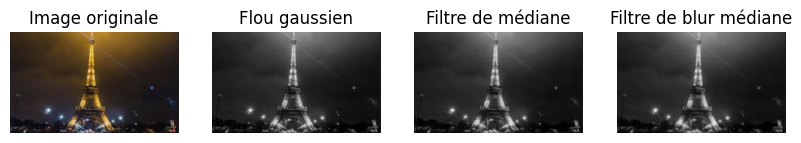

In [12]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import torch
from diffusers import StableDiffusionImg2ImgPipeline
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
from tqdm import tqdm
import os
import tkinter as tk
from tkinter import filedialog, messagebox


# Charger l'image
image = cv2.imread("C:/Users/ranus/OneDrive/Bureau/test2.png")

# Convertir l'image en niveaux de gris
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#gray_image = cv2.imread("C:/Users/ranus/OneDrive/Images/Captures d’écran/test.png")

# Appliquer un filtre de flou gaussien pour réduire le bruit
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Optionnel : Appliquer un filtre de médiane pour réduire le bruit impulsionnel
median_image = cv2.medianBlur(gray_image, 5)
median_blurred_image = cv2.medianBlur(blurred_image, 5)

# Afficher les images
plt.figure(figsize=(10, 10))

plt.subplot(1, 4, 1)
plt.title('Image originale')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 4, 2)
plt.title('Flou gaussien')
plt.imshow(blurred_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.title('Filtre de médiane')
plt.imshow(median_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.title('Filtre de blur médiane')
plt.imshow(median_blurred_image, cmap='gray')
plt.axis('off')

plt.show()

# video cleaner

In [35]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import torch
from diffusers import StableDiffusionImg2ImgPipeline
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
from tqdm import tqdm
import os
import tkinter as tk
from tkinter import filedialog, messagebox


def mediane(img):
    return cv2.medianBlur(img, 5)

def gaussian(img):
    return cv2.GaussianBlur(img, (5, 5), 0)

def diffuseur(img):
    url = path 
    response = requests.get(url)
    image = Image.open(BytesIO(response.content))
    
    image = image.resize((512, 512))
    
    pipeline = StableDiffusionImg2ImgPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", torch_dtype=torch.float16)
    pipeline = pipeline.to("cuda") 
    
    # Préparer l'image pour le pipeline
    init_image = pipeline.preprocess(image).to(pipeline.device)
    
    # Débruiter l'image
    with torch.no_grad():
        output = pipeline(prompt="", init_image=init_image, strength=0.75, guidance_scale=7.5)
    
    # Convertir le résultat en image PIL
    result_image = pipeline.numpy_to_pil(output.images)[0]


def load_video():
    global video_path
    video_path = filedialog.askopenfilename(filetypes=[("Video Files", "*.mp4;*.avi")])
    if video_path:
        messagebox.showinfo("Info", "Vidéo chargée avec succès")


def denoise_video():
    if not video_path:
        messagebox.showwarning("Attention", "Veuillez charger une vidéo d'abord")
        return

    if not os.path.exists('frames'):
        os.makedirs('frames')

    cap = cv2.VideoCapture(video_path)
    count = 0

    while True:
        ret, frame = cap.read()
        if not ret:
            break
        cv2.imwrite(f'frames/frame{count:04d}.png', frame)
        count += 1

    cap.release()
    cv2.destroyAllWindows()

    path = "frames"
    images = [img for img in os.listdir(path) if img.endswith(('.jpg', '.png', '.jpeg', '.png'))]

    for img_name in tqdm(images):
        img_path = os.path.join(path, img_name)
        img2 = cv2.imread(img_path)

        if img2 is None:
            print(f"Erreur lors de la lecture de {img_path}")
            continue

        if selected_filter.get() == 'mediane':
            modified_img = mediane(img2)
        elif selected_filter.get() == 'gaussian':
            modified_img = gaussian(img2)
        else:
            modified_img = diffuser(img2)

        cv2.imwrite(img_path, modified_img)

    messagebox.showinfo("Info", "Débruitage terminé")


def save_video():
    frame_folder = 'frames'
    video_name = filedialog.asksaveasfilename(defaultextension=".mp4", filetypes=[("Video Files", "*.mp4")])
    if not video_name:
        return

    fps = 30  

    images = [img for img in os.listdir(frame_folder) if img.endswith(".png")]
    images.sort()  # Trier les images par nom

    frame = cv2.imread(os.path.join(frame_folder, images[0]))
    height, width, layers = frame.shape

    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    video = cv2.VideoWriter(video_name, fourcc, fps, (width, height))

    for image in tqdm(images):
        video.write(cv2.imread(os.path.join(frame_folder, image)))

    video.release()
    cv2.destroyAllWindows()
    messagebox.showinfo("Info", "Vidéo sauvegardée avec succès")


root = tk.Tk()
root.title("Débruitage de Vidéo")
root.config(background='#2e3a92')
label_title=tk.Label(root, text="Bienvenue sur Denoiser", font=("Arial",40), bg='#2e3a92',fg='white')
label_title.pack(expand='YES')
label_subtitle=tk.Label(root, text="Conçu par moi & co", font=("Arial",11), bg='#2e3a92',fg='white')
label_subtitle.pack(expand='YES')
selected_filter = tk.StringVar(value='mediane')

tk.Label(root, text="Choisissez le filtre à appliquer:").pack(pady=10)
tk.Radiobutton(root, text="Filtre Médiane", variable=selected_filter, value='mediane',bg = '#2e3a92',fg='#909199').pack()
tk.Radiobutton(root, text="Filtre Gaussien", variable=selected_filter, value='gaussian',fg='#909199').pack()
tk.Radiobutton(root, text="Filtre Diffuseur", variable=selected_filter, value='diffuseur',fg='#909199').pack()

tk.Button(root, text="Charger Vidéo", command=load_video,fg='#909199').pack(pady=10)
tk.Button(root, text="Débruiter Vidéo", command=denoise_video,fg='#909199').pack(pady=10)
tk.Button(root, text="Sauvegarder Vidéo", command=save_video).pack(pady=10)

video_path = ""

root.mainloop()